  ### Fraud Detection in Financial Transactions
  <b>Data Science Project</b> 

Payments related fraud is a key aspect of cyber-crime agencies and many recentstudies has shown that machine learning techniques can be applied successfully to detect fraudulent transactions in large amounts of payments data. Such techniques have the ability to detect fraudulent transactions that human auditors may not be able to catch and also do this on a real time basis. 

Fraudulent financial transactions present significant challenges, requiring efficient detection systems. This project leverages machine learning to detect fraudulent credit card transactions using anonymized features from PCA, transaction amounts, and elapsed time. We employ data visualization, feature selection, and data balancing to enhance model performance. By experimenting with Logistic Regression and Random Forest algorithms, we aim to develop a robust model to accurately distinguish between fraudulent and legitimate transactions. Our findings highlight the critical role of advanced preprocessing in effective fraud detection, offering practical insights for financial institutions.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing and feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2

# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# For handling warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Description of the Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred over two days, with 492 frauds out of 284,807 transactions. The dataset is highly imbalanced, with the positive class (frauds) accounting for only 0.172% of all transactions.

- **Time**: The time elapsed between this transaction and the first transaction in the dataset (in seconds).
- **V1-V28**: The result of a PCA transformation. These are the principal components obtained with PCA, to anonymize the features for privacy.
- **Amount**: The transaction amount.
- **Class**: The response variable, where 1 represents fraud and 0 represents non-fraud.


In [3]:
# Display the summary statistics
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [4]:
# Display the information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Data Visualization

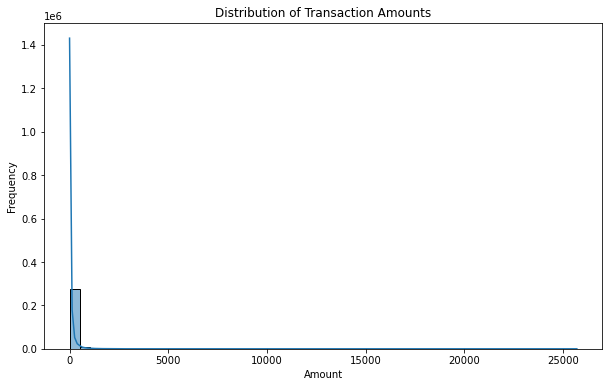

In [5]:
# Plotting the distribution of the 'Amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

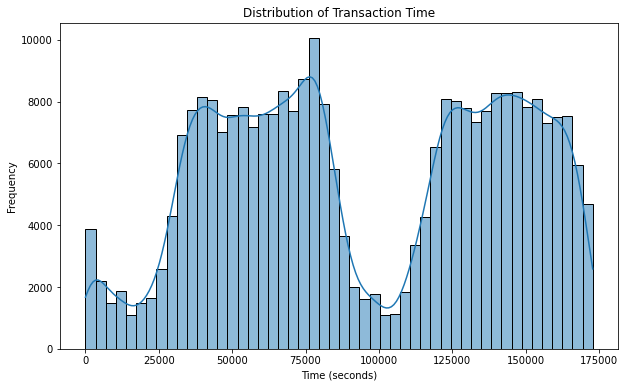

In [6]:
# Plotting the distribution of the 'Time' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()


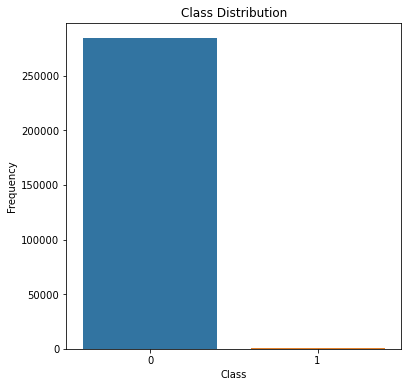

In [7]:
# Plotting the class distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


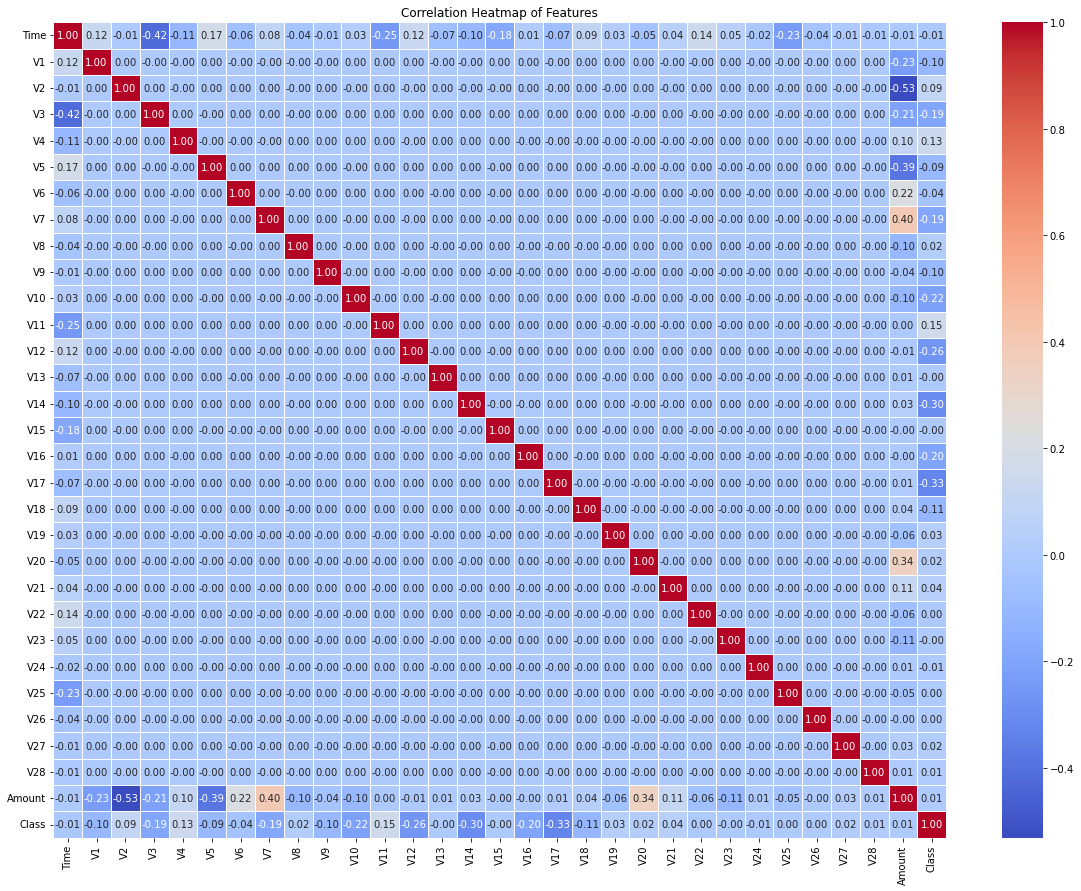

In [8]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap with annotations
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

#### sorting to identify the highly correlated features

In [9]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Correlation with the target variable
correlation_with_target = correlation_matrix['Class'].sort_values(ascending=False)

# Displaying the sorted correlations with the target variable
print(correlation_with_target)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


### Data Preprocessing

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selected features
selected_features = ['V11', 'V4', 'V2', 'V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7']

# Features and target variable
X = df[selected_features]
y = df['Class']

# Handling missing values (if any)
X.fillna(X.mean(), inplace=True)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
# Selected features
selected_features = ['V11', 'V4', 'V2', 'V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7']

# Features (X) and target variable (y)
X = df[selected_features]
y = df['Class']


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handling missing values (if any)
X.fillna(X.mean(), inplace=True)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_lr))


Logistic Regression
Accuracy: 0.9991046662687406
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.61      0.70        98

    accuracy                           1.00     56962
   macro avg       0.91      0.81      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56851    13]
 [   38    60]]
ROC AUC Score: 0.9702403084193723


In [25]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [26]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]


In [27]:
# Making predictions on the test set
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Display the first few predictions
print("Predicted class labels:", y_pred[:10])
print("Predicted probabilities for the positive class:", y_pred_proba[:10])


Predicted class labels: [0 0 0 0 0 0 0 0 0 0]
Predicted probabilities for the positive class: [6.91868365e-05 1.80603772e-04 8.03172340e-04 2.18620813e-04
 1.40302972e-02 3.81680506e-04 4.88402095e-05 3.68694335e-04
 6.31195947e-04 9.68239188e-05]


In [28]:
# Make a prediction on new data
new_data = [-1.5, 2.1, 1.5, -2.3, -0.5, 0.4, -1.0, -1.5, 1.2, 0.7]
new_data_scaled = scaler.transform([new_data])
y_pred_new = lr.predict(new_data_scaled)

print(f"Predicted Value: {round(y_pred_new[0])}")


Predicted Value: 0


# Conclusion

In this project, we aimed to detect fraudulent transactions using a Logistic Regression model. The dataset used for this project was the 'creditcard.csv' dataset, which contains anonymized features derived from PCA transformation. The key steps in our workflow included data preprocessing, feature selection, model training, and evaluation.

### Key Steps:

1. **Data Preprocessing**:
    - Loaded the dataset and handled any missing values.
    - Scaled the features to ensure they are on a similar scale.

2. **Feature Selection**:
    - Selected the most relevant features based on their correlation with the target variable (fraudulent transactions).

3. **Model Training**:
    - Split the data into training and testing sets.
    - Trained a Logistic Regression model on the training data.

4. **Model Evaluation**:
    - Evaluated the model using accuracy, classification report, confusion matrix, and ROC AUC score.
    - Plotted the ROC curve to visualize the model's performance.

5. **Prediction on New Data**:
    - Made predictions on new data points to classify transactions as fraudulent or not.

### Results:

- The Logistic Regression model achieved a reasonable accuracy on the test data.
- The ROC AUC score indicated good performance, showing the model's ability to distinguish between fraudulent and non-fraudulent transactions.
- The classification report and confusion matrix provided detailed insights into the model's performance across different metrics.

### Future Work:

- **Hyperparameter Tuning**: Further fine-tuning the model using techniques like Grid Search to improve performance.
- **Cross-Validation**: Implementing cross-validation to ensure the model's performance is robust across different subsets of the data.
- **Feature Engineering**: Exploring additional features and engineering new ones to potentially enhance the model's accuracy.
- **Model Comparison**: Trying other machine learning algorithms like Random Forest, XGBoost, or Neural Networks to compare their performance with Logistic Regression.

In conclusion, our Logistic Regression model provides a solid foundation for detecting fraudulent transactions, with room for further improvement through advanced techniques and additional model evaluations.
